In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("C:/Users/johnr/Downloads/Adidas US Sales Datasets.xlsx")

In [3]:
data.head(2)

Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   2020-01-01  Northeast  New York  New York   
1  Foot Locker      1185732   2020-01-02  Northeast  New York  New York   

                   Product  Price per Unit  Units Sold  Total Sales  \
0    Men's Street Footwear            50.0        1200     600000.0   
1  Men's Athletic Footwear            50.0        1000     500000.0   

   Operating Profit  Operating Margin Sales Method  
0          300000.0               0.5     In-store  
1          150000.0               0.3     In-store

In [4]:
import datetime
data['Year'] = pd.DatetimeIndex(data['Invoice Date']).year

# Descriptive Statistics

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
 13  Year              9648 non-null   int64         
dtypes: datetime64[ns](1), fl

In [6]:
data.describe()

Retailer ID  Price per Unit   Units Sold    Total Sales  \
count  9.648000e+03     9648.000000  9648.000000    9648.000000   
mean   1.173850e+06       45.216625   256.930037   93273.437500   
std    2.636038e+04       14.705397   214.252030  141916.016727   
min    1.128299e+06        7.000000     0.000000       0.000000   
25%    1.185732e+06       35.000000   106.000000    4254.500000   
50%    1.185732e+06       45.000000   176.000000    9576.000000   
75%    1.185732e+06       55.000000   350.000000  150000.000000   
max    1.197831e+06      110.000000  1275.000000  825000.000000   

       Operating Profit  Operating Margin         Year  
count       9648.000000       9648.000000  9648.000000  
mean       34425.244761          0.422991  2020.865050  
std        54193.113713          0.097197     0.341688  
min            0.000000          0.100000  2020.000000  
25%         1921.752500          0.350000  2021.000000  
50%         4371.420000          0.410000  2021.000000  
75%        52062.500000          0.490000  2021.000000  
max       390000.000000          0.800000  2021.000000

# Uni Variate Analysis

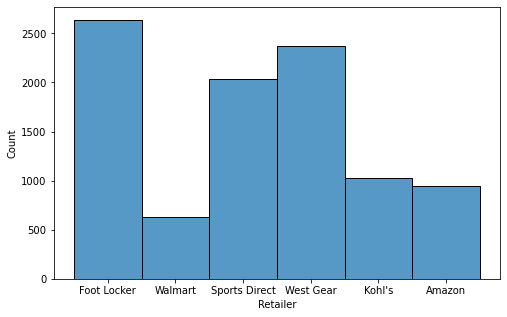

In [7]:
plt.figure(figsize = (8,5))
sns.histplot(data['Retailer'])
plt.show()

-Footlocker is the highest trending followed by West Gear

<AxesSubplot:xlabel='Region', ylabel='Count'>

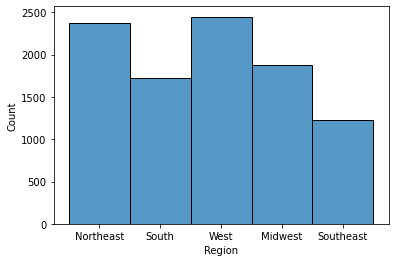

In [8]:
sns.histplot(data['Region'])

<AxesSubplot:xlabel='Total Sales', ylabel='Count'>

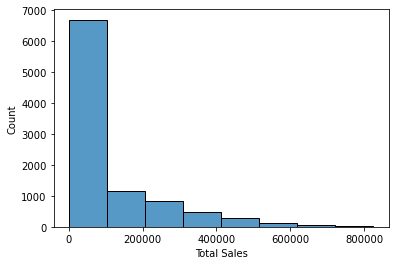

In [9]:
sns.histplot(data['Total Sales'], bins = 8)

The Total Sales is right skewed

<AxesSubplot:xlabel='Operating Profit', ylabel='Count'>

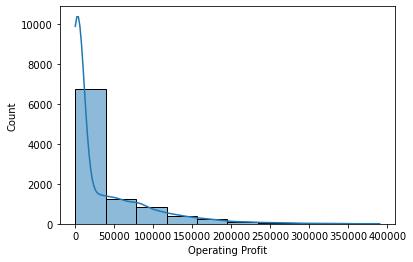

In [10]:
sns.histplot(data['Operating Profit'], bins = 10, kde = True)

As total sales is dependant on profit, Operational Profit is also right skewed

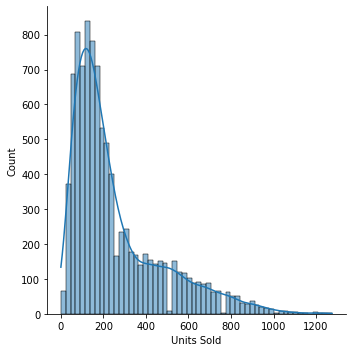

In [11]:
sns.displot(data['Units Sold'], kde = True)
plt.show()

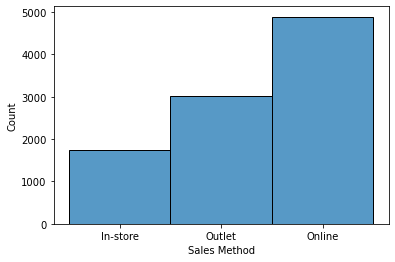

In [12]:
sns.histplot(data['Sales Method'])
plt.show()

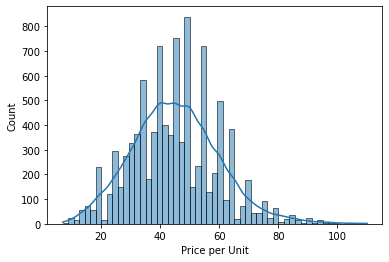

In [13]:
sns.histplot(data['Price per Unit'], kde = True)
plt.show()

### HISTOGRAM OBSERVATIONS
1. Footlocker is the most frequent occuring retailer in the dataset
2. Total Sales, Operating profit, Operating Margin and Units Sold are interrelated and are **RIGHT SKEWED**
3. 'Price Per unit' is normally distributed
4. Online sales are the highest
5. All products are more or less equally distributed
6. North east and West contribute to the most observed regions throughout the dataset

# Bi-variate Analysis

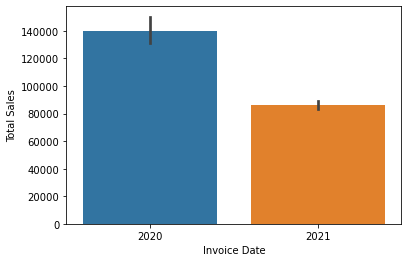

In [14]:
sns.barplot(data = data, x = pd.DatetimeIndex(data['Invoice Date']).year, y = 'Total Sales')
plt.show()

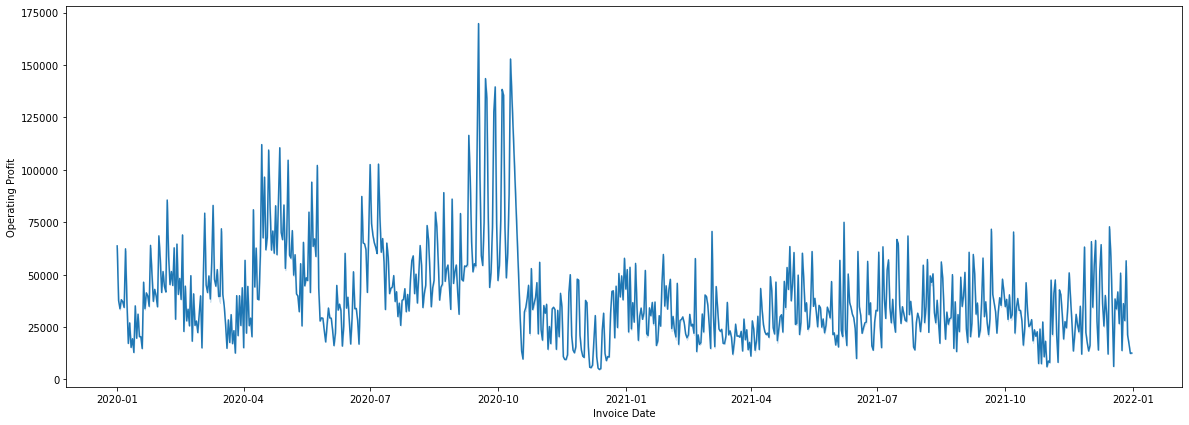

In [15]:
plt.figure(figsize=(20,7))
sns.lineplot(data = data, x = 'Invoice Date', y = 'Operating Profit', ci = False)
plt.show()

- The profit spiked from 8/20 to 10/20
- There was an immediate dip in Operating profit
- The profits stayed consistent post the dip maximizing just above 50,000

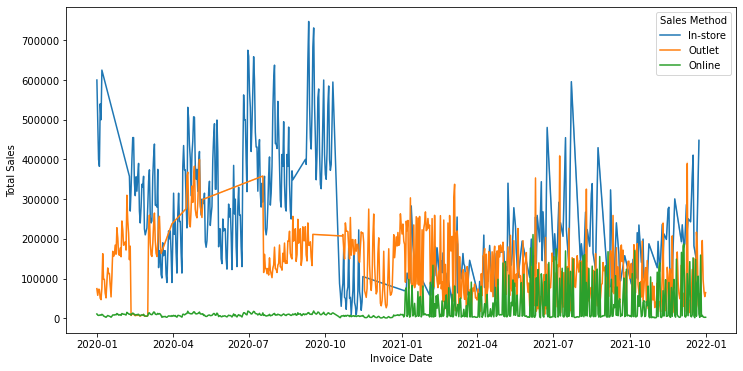

In [16]:
plt.figure(figsize=(12,6))
sns.lineplot(data = data, x = 'Invoice Date', y = 'Total Sales', ci = False, hue = 'Sales Method')
plt.show()

- The decrease in Total Sales is heavily dependent on the dip observed by the 'In-store' Sales method 
- Outlet sales have rather been fluctuating in the similar range throughout
- Online sales have picked up from 2021

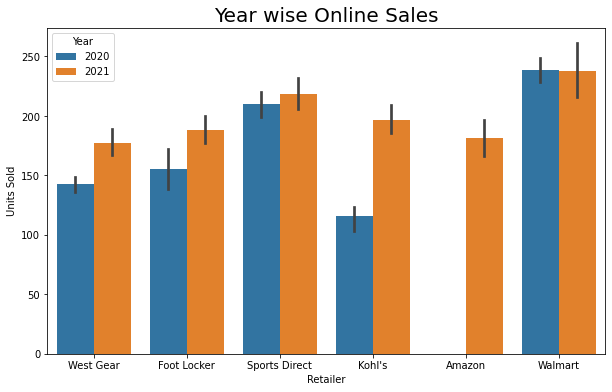

In [17]:
##PLOTTING ONLINE DATA 
OnlineData = pd.DataFrame(data[['Retailer','Sales Method', 'Units Sold', 'Year']][data['Sales Method'] == 'Online'])
plt.figure(figsize = (10,6))
sns.barplot(data = OnlineData, x = 'Retailer', y = 'Units Sold', hue = 'Year').set_title('Year wise Online Sales', fontdict={'size': 20})
plt.show()

## Reasons for subsequent surge in online sales
- Sales via 'Amazon' was started in the year 2021
- Kohl's sales of Adidas products increased significantly
- Footlocker and WestGear have seen an increase in sales online vs 2020

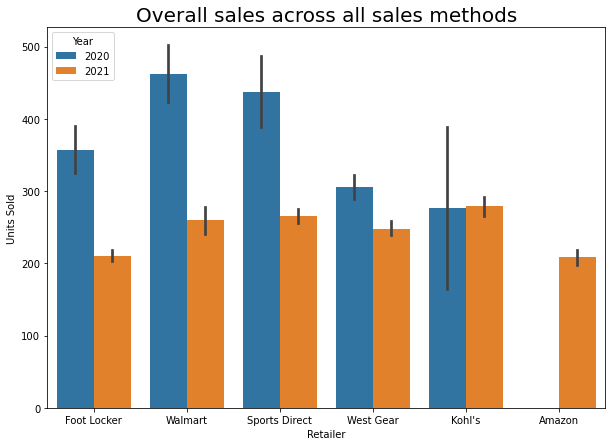

In [18]:
plt.figure(figsize = (10,7))
sns.barplot(data = data, x = 'Retailer', y = 'Units Sold', hue = 'Year').set_title('Overall sales across all sales methods',fontdict={'size': 20})
plt.show()

- Footlocker, Walmart and Sports Direct have dropped their sales significantly in 2021 when compared to 2020
- Kohl's overall sales remained similar comparatively

**THIS IMPLIES THAT THE DIP IN SALES IS DUE TO IN-STORE SALES**

## Why did the sales drop in stores? 

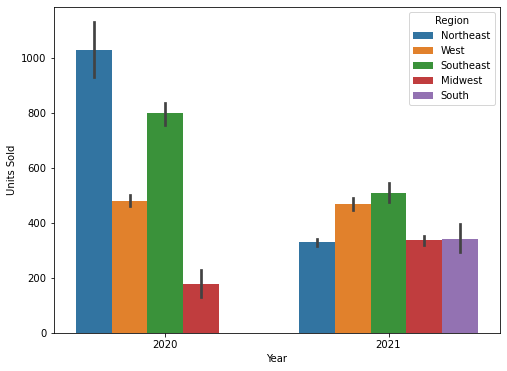

In [19]:
plt.figure(figsize = (8, 6))
sns.barplot(data = data[(data['Sales Method'] == 'In-store')], x = 'Year', y = 'Units Sold', hue = 'Region')
plt.show()

- 2020 consisted of 4 regions whereas 2021 consisted of 5 regions 
- However, the sales in 2021 throughout has reduced

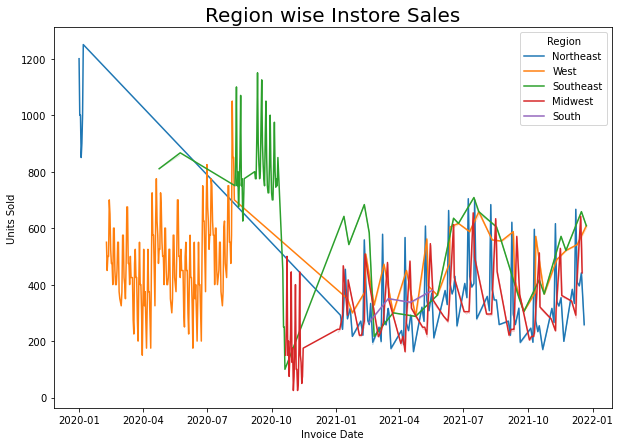

In [20]:
plt.figure(figsize = (10,7))
sns.lineplot(data = data[data['Sales Method'] == 'In-store'], x = 'Invoice Date', y = 'Units Sold', hue = 'Region', ci = False).set_title('Region wise Instore Sales', fontdict={'size': 20})
plt.show()

1. Northeast and Southeast regions experienced a massive dip in terms of Units sold
2. There was an increase in West region which collapsed later on as well

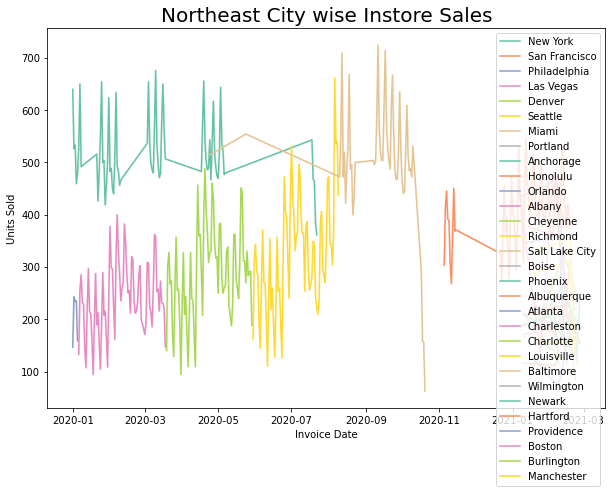

In [21]:
plt.figure(figsize = (10,7))
sns.lineplot(data = data[((data['Region'] == 'Southeast') | (data['Region'] == 'Northeast') | (data['Region'] == 'West')) & (data['Invoice Date'] < '2021-03-01')],
             x = 'Invoice Date',
             y = 'Units Sold',
             hue = 'City',
             ci = False,
            palette = 'Set2').set_title('Northeast City wise Instore Sales', fontdict={'size': 20})
plt.legend(loc='upper right')
plt.show()

### The following cities which record the highest units sold stopped contributing to the overall sales in Q4 2020:
1. Miami from the Southeast region (Between April 2020 to December 2020)
2. New York from the Northeast region (Between January 2020 to September 2020) 
3. Las Vegas, Seattle and Denver from the West region (Quarterly until August 2020)


- It was also observed that from 01/2021, various cities have STARTED recording sales in these regions. This can imply:
    - These three stints (in 2020) were a part of test run for expanding their sales' geofence in 2021
    - The end of these test runs caused the dip in the Total Sales

# CORRELATION

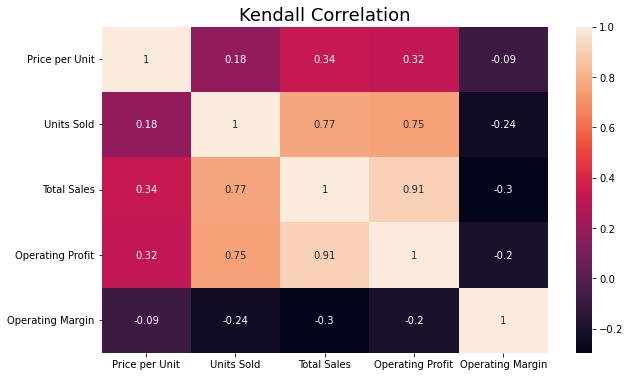

In [25]:
correlationData = data[['Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin']]
correlation = correlationData.corr(method='kendall')
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True)
plt.title('Kendall Correlation', size=18)
plt.show()

#print('Features\'s correlation with Target Feature')
#for indx, cor in enumerate(correlation['Total Sales']):
 #   print(correlation.index[indx], cor)

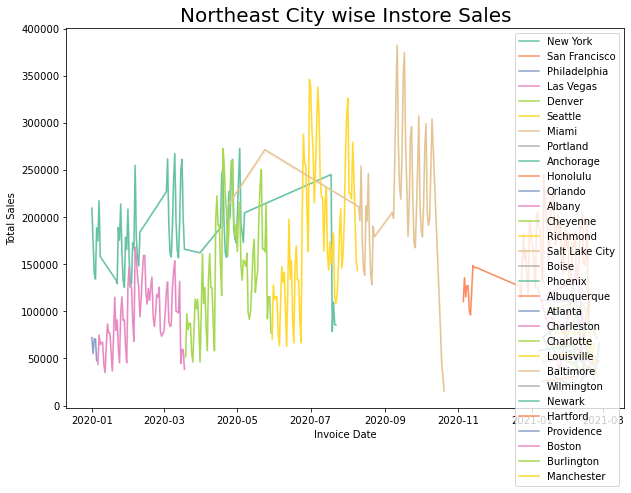

In [23]:
plt.figure(figsize = (10,7))
sns.lineplot(data = data[((data['Region'] == 'Southeast') | (data['Region'] == 'Northeast') | (data['Region'] == 'West')) & (data['Invoice Date'] < '2021-03-01')],
             x = 'Invoice Date',
             y = 'Total Sales',
             hue = 'City',
             ci = False,
            palette = 'Set2').set_title('Northeast City wise Instore Sales', fontdict={'size': 20})
plt.legend(loc='upper right')
plt.show()

# Clustering 

### K means Clustering

In [24]:
# Omitting string columns
clusterData = data[['Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin']]
clusterData.head(2)

Price per Unit  Units Sold  Total Sales  Operating Profit  Operating Margin
0            50.0        1200     600000.0          300000.0               0.5
1            50.0        1000     500000.0          150000.0               0.3

#### MIN-MAX SCALING

In [26]:
# Omitting string columns
clusterData1 = data[['Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin']]
clusterData1.head(2)

Price per Unit  Units Sold  Total Sales  Operating Profit  Operating Margin
0            50.0        1200     600000.0          300000.0               0.5
1            50.0        1000     500000.0          150000.0               0.3

In [27]:
from sklearn.preprocessing import MinMaxScaler
minMax = MinMaxScaler()
minMaxData = pd.DataFrame(minMax.fit_transform(clusterData1),columns = minMax.feature_names_in_)
minMaxData.head(2)

Price per Unit  Units Sold  Total Sales  Operating Profit  Operating Margin
0        0.417476    0.941176     0.727273          0.769231          0.571429
1        0.417476    0.784314     0.606061          0.384615          0.285714

In [28]:
from sklearn.cluster import KMeans
import plotly.graph_objects as go
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10, random_state=42
    )
    kmeans.fit(minMaxData)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
        dict(
            x=3,
            y=inertia[2],
            xref="x",
            yref="y",
            text="Elbow!",
            showarrow=True,
            arrowhead=7,
            ax=20,
            ay=-40
        )
    ])

In [29]:
from sklearn.cluster import KMeans
kMeansClustering = KMeans(n_clusters = 3)
kMeansClustering.fit(minMaxData)
clusterData1['Clusters'] = kMeansClustering.predict(minMaxData)

C:\Users\johnr\AppData\Local\Temp\ipykernel_20996\1041262631.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
import plotly.express as px
polar=clusterData1.groupby("Clusters").mean().reset_index()
polar=pd.melt(polar,id_vars=["Clusters"])
fig = px.line_polar(polar, r="value", theta="variable", color="Clusters", line_close=True)
fig.show()

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [31]:
polar

Clusters          variable          value
0          0    Price per Unit      61.207464
1          1    Price per Unit      42.129462
2          2    Price per Unit      47.742534
3          0        Units Sold     731.953897
4          1        Units Sold     138.641489
5          2        Units Sold     410.469683
6          0       Total Sales  438995.883644
7          1       Total Sales   12821.479546
8          2       Total Sales  188367.003620
9          0  Operating Profit  165067.494512
10         1  Operating Profit    5274.648002
11         2  Operating Profit   66665.450878
12         0  Operating Margin       0.379802
13         1  Operating Margin       0.452540
14         2  Operating Margin       0.353525

#### STANDARD SCALING

In [32]:
clusterData2 = data[['Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin']]
clusterData2.head(2)

Price per Unit  Units Sold  Total Sales  Operating Profit  Operating Margin
0            50.0        1200     600000.0          300000.0               0.5
1            50.0        1000     500000.0          150000.0               0.3

In [33]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaledData = pd.DataFrame(standardScaler.fit_transform(clusterData2), columns = standardScaler.feature_names_in_)
standardScaledData.head(2)

Price per Unit  Units Sold  Total Sales  Operating Profit  Operating Margin
0        0.325297    4.401913     3.570794          4.900780          0.792333
1        0.325297    3.468385     2.866115          2.132757         -1.265442

In [34]:
from sklearn.cluster import KMeans
import plotly.graph_objects as go
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10, random_state=42
    )
    kmeans.fit(standardScaledData)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
        dict(
            x=3,
            y=inertia[2],
            xref="x",
            yref="y",
            text="Elbow!",
            showarrow=True,
            arrowhead=7,
            ax=20,
            ay=-40
        )
    ])

In [35]:
from sklearn.cluster import KMeans
kMeansClustering = KMeans(n_clusters = 3)
kMeansClustering.fit(standardScaledData)
clusterData2['Clusters'] = kMeansClustering.predict(standardScaledData)
standardScaledData['Clusters'] = kMeansClustering.predict(standardScaledData)
clusterData2

C:\Users\johnr\AppData\Local\Temp\ipykernel_20996\2544038190.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Price per Unit  Units Sold  Total Sales  Operating Profit  \
0               50.0        1200     600000.0         300000.00   
1               50.0        1000     500000.0         150000.00   
2               40.0        1000     400000.0         140000.00   
3               45.0         850     382500.0         133875.00   
4               60.0         900     540000.0         162000.00   
...              ...         ...          ...               ...   
9643            50.0          64       3200.0            896.00   
9644            41.0         105       4305.0           1377.60   
9645            41.0         184       7544.0           2791.28   
9646            42.0          70       2940.0           1234.80   
9647            29.0          83       2407.0            649.89   

      Operating Margin  Clusters  
0                 0.50         2  
1                 0.30         2  
2                 0.35         2  
3                 0.35         2  
4                 0.30         2  
...                ...       ...  
9643              0.28         0  
9644              0.32         0  
9645              0.37         0  
9646              0.42         1  
9647              0.27         0  

[9648 rows x 6 columns]

In [36]:
polar=clusterData2.groupby("Clusters").mean().reset_index()
polar=pd.melt(polar,id_vars=["Clusters"])
fig = px.line_polar(polar, r="value", theta="variable", color="Clusters", line_close=True)
fig.show()

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [37]:
polar=standardScaledData.groupby("Clusters").mean().reset_index()
polar=pd.melt(polar,id_vars=["Clusters"])
fig = px.line_polar(polar, r="value", theta="variable", color="Clusters", line_close=True)
fig.show()

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [38]:
polar

Clusters          variable     value
0          0    Price per Unit -0.066649
1          1    Price per Unit -0.248496
2          2    Price per Unit  0.808158
3          0        Units Sold -0.061803
4          1        Units Sold -0.596798
5          2        Units Sold  1.747567
6          0       Total Sales -0.102283
7          1       Total Sales -0.605634
8          2       Total Sales  1.851285
9          0  Operating Profit -0.132796
10         1  Operating Profit -0.566338
11         2  Operating Profit  1.804264
12         0  Operating Margin -0.770866
13         1  Operating Margin  0.739329
14         2  Operating Margin -0.497570

## CLUSTERING WITH ONLY TWO FEATURES

In [39]:
clusterDataColumns = data[['Price per Unit', 'Operating Margin']]
clusterDataColumns.head(2)

Price per Unit  Operating Margin
0            50.0               0.5
1            50.0               0.3

In [40]:
from sklearn.preprocessing import StandardScaler
standardScalerColumn = StandardScaler()
standardScaledColumn = pd.DataFrame(standardScaler.fit_transform(clusterDataColumns), columns = standardScaler.feature_names_in_)
standardScaledColumn.head(2)

Price per Unit  Operating Margin
0        0.325297          0.792333
1        0.325297         -1.265442

In [43]:
from sklearn.cluster import KMeans
kMeansClustering = KMeans(n_clusters = 3)
kMeansClustering.fit(standardScaledColumn)
standardScaledColumn['Clusters'] = kMeansClustering.predict(standardScaledColumn)

<AxesSubplot:xlabel='Operating Margin', ylabel='Price per Unit'>

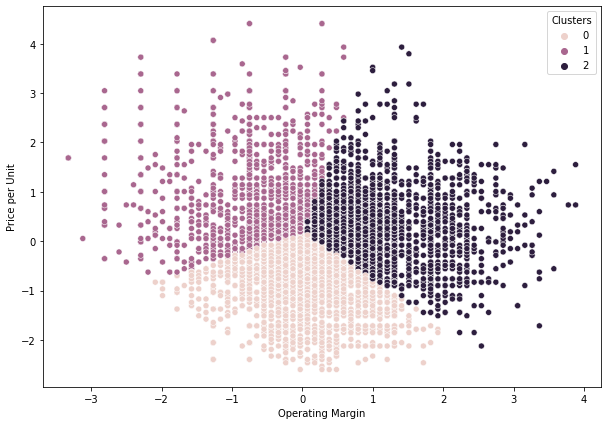

In [44]:
plt.figure(figsize = (10,7))
sns.scatterplot(data = standardScaledColumn, x = 'Operating Margin', y = 'Price per Unit', hue = 'Clusters')